In [43]:
import sklearn
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [90]:
print('linear regression')
print('load data set')

linear regression
load data set


In [36]:
df= pd.read_csv("bu_is.csv")
df

,Date,time,temperatur,humidity,wind_speed,general_diffuse_flows,general_deffuse,zone_1_power_consumption,zone_2_power_consumption,zone_3_power_consumption
0,1/1/2017,0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017,0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017,0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017,0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017,0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...,...
52411,12/30/2017,23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017,23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017,23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017,23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [37]:
df1 =df[['time','temperatur','humidity','wind_speed', 'general_diffuse_flows','general_deffuse', 'zone_1_power_consumption']]
df1.head(5)

,time,temperatur,humidity,wind_speed,general_diffuse_flows,general_deffuse,zone_1_power_consumption
0,0:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,0:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,0:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,0:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,0:40,5.921,75.7,0.081,0.048,0.085,27335.69620


In [38]:
print('visualisasi zona 1')

visualisasi zona 1


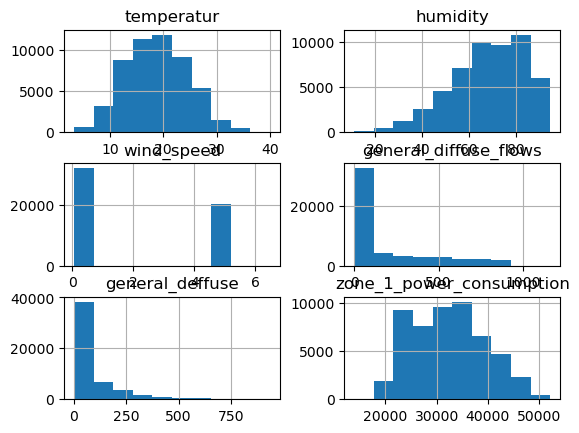

In [39]:
viz=df1 [['temperatur','humidity','wind_speed', 'general_diffuse_flows','general_deffuse', 'zone_1_power_consumption']]
viz.hist()
plt.show()

In [40]:
print('deskripsi')
df1.describe()

deskripsi


,temperatur,humidity,wind_speed,general_diffuse_flows,general_deffuse,zone_1_power_consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120


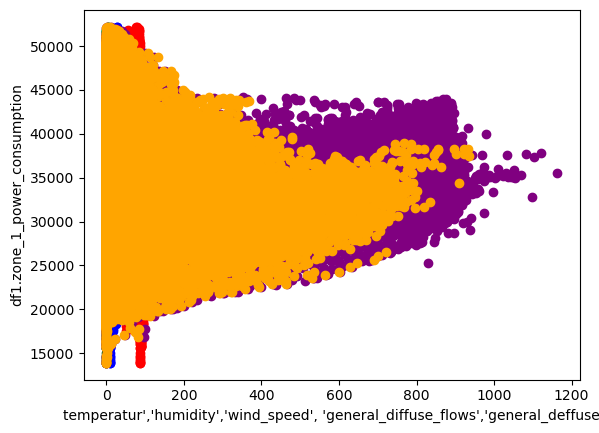

In [41]:
plt.scatter(df1.temperatur , df1.zone_1_power_consumption ,color ='blue')
plt.scatter(df1.humidity , df1.zone_1_power_consumption,color ='red')
plt.scatter(df1.wind_speed , df1.zone_1_power_consumption,color ='green')
plt.scatter(df1.general_diffuse_flows , df1.zone_1_power_consumption,color ='purple')
plt.scatter(df1.general_deffuse , df1.zone_1_power_consumption,color  ='orange')
plt.xlabel("temperatur','humidity','wind_speed', 'general_diffuse_flows','general_deffuse")
plt.ylabel('df1.zone_1_power_consumption')
plt.show()

In [42]:
print ('proses regresi')

proses regresi


In [45]:
msk = np.random.rand(len(df1)) <0.7
train=df1[msk]
test =df1[~msk]

In [47]:
x_train = np.array(train[['temperatur','humidity','wind_speed', 'general_diffuse_flows','general_deffuse']])
y_train = np.array(train['zone_1_power_consumption'])
print ('x_train',x_train)
print ('y_train',y_train)

x_train [[6.559e+00 7.380e+01 8.300e-02 5.100e-02 1.190e-01]
 [6.121e+00 7.500e+01 8.300e-02 9.100e-02 9.600e-02]
 [5.921e+00 7.570e+01 8.100e-02 4.800e-02 8.500e-02]
 ...
 [6.900e+00 7.280e+01 8.600e-02 8.400e-02 7.400e-02]
 [6.758e+00 7.300e+01 8.000e-02 6.600e-02 8.900e-02]
 [6.580e+00 7.410e+01 8.100e-02 6.200e-02 1.110e-01]]
y_train [34055.6962  28228.86076 27335.6962  ... 29590.87452 28958.1749
 28349.80989]


In [50]:
x_test = np.array(test[['temperatur','humidity','wind_speed', 'general_diffuse_flows','general_deffuse']])
y_test = np.array(test['zone_1_power_consumption'])
print ('x_train',x_test)
print ('y_train',y_test)

x_train [[6.414e+00 7.450e+01 8.300e-02 7.000e-02 8.500e-02]
 [6.313e+00 7.450e+01 8.000e-02 6.200e-02 1.000e-01]
 [5.516e+00 7.750e+01 8.100e-02 5.100e-02 1.080e-01]
 ...
 [8.140e+00 6.973e+01 8.100e-02 6.200e-02 8.500e-02]
 [7.480e+00 7.100e+01 8.500e-02 6.200e-02 1.040e-01]
 [7.010e+00 7.240e+01 8.000e-02 4.000e-02 9.600e-02]]
y_train [29814.68354 29128.10127 23896.70886 ... 34469.96198 33776.42586
 31160.45627]


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
reg = LinearRegression()

In [55]:
reg.fit(df1[['temperatur','humidity','wind_speed', 'general_diffuse_flows','general_deffuse']],df1.zone_1_power_consumption)

LinearRegression()

In [57]:
#the cofficion
print('cooficients',reg.coef_)
print ('intercept',reg.intercept_)

cooficients [ 5.34860698e+02 -5.65100716e+01 -1.48701642e+02 -1.70196475e+00
 -8.73069389e-02]
intercept 26750.451170193955


In [58]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([25928.83430194, 25874.83058152, 25272.16055918, ...,
       27134.64476725, 26704.93234224, 26371.67231027])

In [59]:
from sklearn.metrics import r2_score
r_square = r2_score(y_test,y_pred)
r_square

0.1979268258854976

In [60]:
print ('KNN regresion')

KNN regresion


In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
k = 3 #jumblah tetangga terdekat i jadikan acuan regresi 
model = KNeighborsRegressor(n_neighbors=k)
model.fit (x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [63]:
x_test = np.array (test[['temperatur','humidity','wind_speed', 'general_diffuse_flows','general_deffuse']])
y_test = np.array (test['zone_1_power_consumption'])

print (f"x_test:{x_test}")
print (f"y_test:{y_test}")

x_test:[[6.414e+00 7.450e+01 8.300e-02 7.000e-02 8.500e-02]
 [6.313e+00 7.450e+01 8.000e-02 6.200e-02 1.000e-01]
 [5.516e+00 7.750e+01 8.100e-02 5.100e-02 1.080e-01]
 ...
 [8.140e+00 6.973e+01 8.100e-02 6.200e-02 8.500e-02]
 [7.480e+00 7.100e+01 8.500e-02 6.200e-02 1.040e-01]
 [7.010e+00 7.240e+01 8.000e-02 4.000e-02 9.600e-02]]
y_test:[29814.68354 29128.10127 23896.70886 ... 34469.96198 33776.42586
 31160.45627]


In [64]:
y_pred = model.predict(x_test)
y_pred

array([30211.45561667, 30211.45561667, 23795.44303667, ...,
       35151.33079667, 33597.97211667, 30726.48922333])

In [65]:
print ('coefficien of determination /R^2')

coefficien of determination /R^2


In [66]:
from sklearn.metrics import r2_score
r_squared =r2_score(y_test, y_pred)
r_squared

0.27796247857284384

In [67]:
print('Mean Absoulute Eror (MAE)')

Mean Absoulute Eror (MAE)


In [68]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)
MAE

4265.095392211476

In [69]:
print ('Mean Squered Error (MSE)')

Mean Squered Error (MSE)


In [70]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
MSE

36444746.32463631

In [71]:
print ('Features scalling (Standard Scaler)')

Features scalling (Standard Scaler)


In [72]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [73]:
x_train = np.array(train[['temperatur','humidity','wind_speed', 'general_diffuse_flows','general_deffuse']])

y_train = np.array(train['zone_1_power_consumption'])

x_test = np.array(test[['temperatur','humidity','wind_speed', 'general_diffuse_flows','general_deffuse']])

y_test = np.array(test['zone_1_power_consumption'])

In [74]:
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

print (x_train_scaled)
print (x_test_scaled)

[[-2.09945064  0.35412674 -0.79824278 -0.69136303 -0.60531137]
 [-2.17453175  0.43122083 -0.79824278 -0.69121185 -0.60549786]
 [-2.20881536  0.47619238 -0.79909446 -0.69137437 -0.60558706]
 ...
 [-2.04099709  0.28988167 -0.79696526 -0.6912383  -0.60567625]
 [-2.06533845  0.30273068 -0.7995203  -0.69130634 -0.60555462]
 [-2.09585086  0.37340026 -0.79909446 -0.69132146 -0.60537624]]
[[-2.12430626  0.39909829 -0.79824278 -0.69129122 -0.60558706]
 [-2.14161948  0.39909829 -0.7995203  -0.69132146 -0.60546543]
 [-2.27823967  0.59183352 -0.79909446 -0.69136303 -0.60540056]
 ...
 [-1.8284387   0.09264929 -0.79909446 -0.69132146 -0.60558706]
 [-1.94157462  0.17424053 -0.7973911  -0.69132146 -0.605433  ]
 [-2.0221411   0.26418364 -0.7995203  -0.69140461 -0.60549786]]


In [75]:
print ('Training dan Evaluasi Model')

Training dan Evaluasi Model


In [76]:
y_pred = model.predict (x_test_scaled)
y_pred

array([40143.97972, 40143.97972, 40143.97972, ..., 40143.97972,
       40143.97972, 40143.97972])

In [77]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print ("MAE:",MAE)
print ("MSE:",MSE)

MAE: 9057.108714191745
MSE: 113115542.04578963


In [78]:
print ('Polynominal Regression Quadratic')

Polynominal Regression Quadratic


In [79]:
x_train = np.array(train[['temperatur','humidity','wind_speed', 'general_diffuse_flows','general_deffuse']])
y_train = np.array(train[['zone_1_power_consumption']])
print("x_train: ", x_train)
print("y_train: ", y_train)

x_train:  [[6.559e+00 7.380e+01 8.300e-02 5.100e-02 1.190e-01]
 [6.121e+00 7.500e+01 8.300e-02 9.100e-02 9.600e-02]
 [5.921e+00 7.570e+01 8.100e-02 4.800e-02 8.500e-02]
 ...
 [6.900e+00 7.280e+01 8.600e-02 8.400e-02 7.400e-02]
 [6.758e+00 7.300e+01 8.000e-02 6.600e-02 8.900e-02]
 [6.580e+00 7.410e+01 8.100e-02 6.200e-02 1.110e-01]]
y_train:  [[34055.6962 ]
 [28228.86076]
 [27335.6962 ]
 ...
 [29590.87452]
 [28958.1749 ]
 [28349.80989]]


In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
quadratic_features = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_features.fit_transform(x_train)
x_train_quadratic

array([[1.0000e+00, 6.5590e+00, 7.3800e+01, ..., 2.6010e-03, 6.0690e-03,
        1.4161e-02],
       [1.0000e+00, 6.1210e+00, 7.5000e+01, ..., 8.2810e-03, 8.7360e-03,
        9.2160e-03],
       [1.0000e+00, 5.9210e+00, 7.5700e+01, ..., 2.3040e-03, 4.0800e-03,
        7.2250e-03],
       ...,
       [1.0000e+00, 6.9000e+00, 7.2800e+01, ..., 7.0560e-03, 6.2160e-03,
        5.4760e-03],
       [1.0000e+00, 6.7580e+00, 7.3000e+01, ..., 4.3560e-03, 5.8740e-03,
        7.9210e-03],
       [1.0000e+00, 6.5800e+00, 7.4100e+01, ..., 3.8440e-03, 6.8820e-03,
        1.2321e-02]])

In [84]:
quadratic_features = PolynomialFeatures(degree=2)
x_test_quadratic = quadratic_features.fit_transform(x_test) 
x_test_quadratic

array([[1.0000e+00, 6.4140e+00, 7.4500e+01, ..., 4.9000e-03, 5.9500e-03,
        7.2250e-03],
       [1.0000e+00, 6.3130e+00, 7.4500e+01, ..., 3.8440e-03, 6.2000e-03,
        1.0000e-02],
       [1.0000e+00, 5.5160e+00, 7.7500e+01, ..., 2.6010e-03, 5.5080e-03,
        1.1664e-02],
       ...,
       [1.0000e+00, 8.1400e+00, 6.9730e+01, ..., 3.8440e-03, 5.2700e-03,
        7.2250e-03],
       [1.0000e+00, 7.4800e+00, 7.1000e+01, ..., 3.8440e-03, 6.4480e-03,
        1.0816e-02],
       [1.0000e+00, 7.0100e+00, 7.2400e+01, ..., 1.6000e-03, 3.8400e-03,
        9.2160e-03]])

In [85]:
model = LinearRegression()
model.fit(x_train_quadratic, y_train)

LinearRegression()

In [86]:
y_pred = model.predict(x_test_quadratic)


In [87]:
print ('y_pred',y_pred)

y_pred [[27218.3327226 ]
 [27218.15825389]
 [26579.58350129]
 ...
 [28254.62070462]
 [27935.41661585]
 [27662.27524912]]


In [88]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print ("MAE:",MAE)
print ("MSE:",MSE)

MAE: 4928.4872175361215
MSE: 38002783.08737625


In [89]:
r_squared =r2_score(y_test, y_pred)
r_squared

0.2470949018735742